In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
ds=pd.read_csv('titanic_data.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [64]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]

df = ds.drop(cols_to_drop, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [66]:
def cov_sex(s):
    if s=='male':
        return 0
    elif s=='female':
        return 1
    else:
        return s

df.Sex=df.Sex.map(cov_sex)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [67]:
data=df.dropna()
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


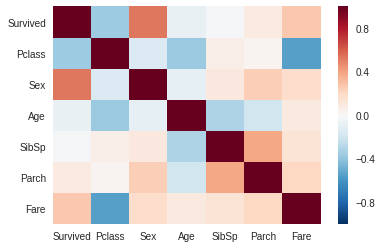

In [68]:
plt.figure()
sns.heatmap(data.corr())

In [90]:
in_cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
ou_cols=['Survived']

X=data[in_cols]
y=data[ou_cols]

In [91]:
data=data.reset_index(drop=True)

# DecisionTree code

In [99]:
def div_data(xdat,fkey,fval):
    xright=pd.DataFrame([],columns=xdat.columns)
    xleft=pd.DataFrame([],columns=xdat.columns)
    
    for i in range(xdat.shape[0]):
        val=xdat[fkey].loc[i]
        if val>fval:
            xright=xright.append(xdat.loc[i])
        else:
            xleft=xleft.append(xdat.loc[i])       
    return xleft,xright

def entro(col):
    pp=col.mean()
    qq=1-pp
    entr=(-1.0 * pp * np.log2(pp))+(-1.0 * qq * np.log2(qq))
    return entr

def infogain(xdata,fkey,fval):
    left ,right=div_data(xdata,fkey,fval)
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return (2*entro(xdata.Survived) - (entro(left.Survived) + entro(right.Survived)))

In [100]:
for fx in X.columns:
    print (fx,)
    print (infogain(data, fx, data[fx].mean()))

Pclass
0.169387944636
Sex
0.412885826748
Age
7.90361215985e-06
SibSp
-0.000906296584044
Parch
0.0130749190565
Fare
0.0955393677915


In [108]:
class DT:
    def __init__(self, depth=0, max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
        
    def train(self,xtrain):
        print (self.depth, '-'*10)
        feat= ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gain=[]
        for f in feat:
            gain.append(infogain(xtrain,f,xtrain[f].mean()))
            
        self.fkey=feat[np.argmax(gain)]    
        self.fval=xtrain[self.fkey].mean()
        
        
        ldata, rdata=div_data(xtrain,self.fkey,self.fval)
        ldata=ldata.reset_index(drop=True)
        rdata=rdata.reset_index(drop=True)
        
        
        if (ldata.shape[0]==0 or rdata.shape[0]==0):
            if xtrain.Survived.mean()>=0.5:
                self.target='Survived'
            else:
                self.target='Dead'
            return
        
        if self.depth>=self.max_depth:
            if xtrain.Survived.mean()>=0.5:
                self.target='Survived'
            else:
                self.target='Dead'
            return
        
        self.right=DT(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(rdata)
        
        self.left=DT(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(ldata)
        
        if xtrain.Survived.mean()>=0.5:
            self.target='Survived'
        else:
            self.target='Dead'
        return
    
    def predict(self,test):
        if test[self.fkey] >= self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [103]:
split = int(0.8 * data.shape[0])
training_data = data[:split]
testing_data = data[split:]

In [111]:
dt = DT()
dt.train(training_data)

0 ----------
1 ----------
2 ----------


/home/aayush/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
/home/aayush/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


3 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------


In [112]:
for ix in testing_data.index[:10]:
    print (dt.predict(testing_data.loc[ix]))

Dead
Survived
Dead
Dead
Dead
Survived
Dead
Survived
Dead
Dead


In [106]:
testing_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
571,0,3,0,33.0,0,0,7.7750
572,1,2,1,6.0,0,1,33.0000
573,0,3,0,17.0,1,0,7.0542
574,0,2,0,34.0,0,0,13.0000
575,0,2,0,50.0,0,0,13.0000
576,1,1,0,27.0,1,0,53.1000
577,0,3,0,20.0,0,0,8.6625
578,1,2,1,30.0,3,0,21.0000
579,0,2,0,25.0,1,0,26.0000
580,0,3,1,25.0,1,0,7.9250
